Q1: What proportion of students who answer this question quickly will pass the class?
Assume the probability of passing the class is 0.9.
Assume the probability of answering this question quickly is 0.6 if you'll pass the class,
while the probability drops to 0.3 if you'll not pass the class. 

---
A: We want to find the probability that a student will pass the class given that they answer this question quickly, i.e., 
$P(\text{Pass} \mid \text{Quick})$.

Given
- $P(\text{Pass}) = 0.9$
- $P(\text{Not Pass}) = 1 - 0.9 = 0.1$
- $P(\text{Quick} \mid \text{Pass}) = 0.6$
- $P(\text{Quick} \mid \text{Not Pass}) = 0.3$

By Bayes’ Theorem

$$
P(\text{Pass} \mid \text{Quick})
\;=\; 
  \frac{ P(\text{Quick} \mid \text{Pass}) \times P(\text{Pass}) }
       { P(\text{Quick} \mid \text{Pass}) \times P(\text{Pass})
       \;+\; P(\text{Quick} \mid \text{Not Pass}) \times P(\text{Not Pass}) }.
$$

Plug in the numbers:

$$
\begin{aligned}
P(\text{Pass} \mid \text{Quick})
&= \frac{(0.6)(0.9)}{(0.6)(0.9) + (0.3)(0.1)} \\
&= \frac{0.54}{0.54 + 0.03} \\
&= \frac{0.54}{0.57} \\
&\approx 0.9474 \quad (\text{about } 94.74\%).
\end{aligned}
$$

**Answer:** Approximately 94.74% of the students who answer the question quickly will pass the class.

___
Q2:

\begin{align*}
\text{Likelihood:} 
&& p(x \mid \theta, n) 
&= \texttt{Multinomial} \\[6pt]
\text{Prior:} 
&& p(\theta \mid \boldsymbol{\alpha}) 
&= \texttt{Dirichlet} \\[6pt]
\text{Posterior:} 
&& p(\theta \mid x, n, \boldsymbol{\alpha}) 
&= \overset{\text{Bayes Theorem}}{\frac{p(x \mid \theta)\,p(\theta)}{p(x)}}
   = \;\texttt{What?}\\[3pt]
&&& \qquad\quad = \;\texttt{What distribution?}\\[3pt]
&&& \qquad\quad\quad\;\; \texttt{With what parameterization?}\\
\end{align*}

The posterior is always proportional to the joint:

$$
p(\theta \mid x) 
= \frac{1}{c} \, p(\theta, x)
\;\;\propto\;\;
p(\theta, x).
$$

And the posterior is always a proper distribution if the prior is.


___
A: 

1. Prior

$$
p(\boldsymbol{\theta} \mid \boldsymbol{\alpha})
\;=\;
\mathrm{Dirichlet}\bigl(\alpha_1,\alpha_2,\dots,\alpha_K\bigr)
$$

Here, $\boldsymbol{\alpha} = (\alpha_1,\dots,\alpha_K)$ are the Dirichlet hyperparameters, and $\boldsymbol{\theta}$ is the vector of category probabilities for the multinomial.


2. Likelihood (Multinomial)

$$
p(\mathbf{x} \mid \boldsymbol{\theta}, n)
\;=\;
\mathrm{Multinomial}(\mathbf{x} \mid n,\boldsymbol{\theta})
$$

where $\mathbf{x} = (x_1, x_2, \dots, x_K)$ are the observed counts of each of the $K$ categories, and $n = \sum_i x_i$ is the total count.


3. Posterior

By Bayes’ theorem and the property of conjugacy, the posterior distribution is again a Dirichlet, with parameters

$$
\boldsymbol{\alpha}' 
\;=\;
(\alpha_1 + x_1,\; \alpha_2 + x_2,\; \dots,\; \alpha_K + x_K).
$$

Thus,

$$
p(\boldsymbol{\theta}\mid \mathbf{x}, n, \boldsymbol{\alpha})
\;=\;
\mathrm{Dirichlet}\bigl(\alpha_1 + x_1,\; \alpha_2 + x_2,\; \dots,\; \alpha_K + x_K\bigr).
$$


___ 
Q3: Create a sample from a three category multinomial distribution and visualize the multinomial distribution and the multinomial sample; then, visualize the simplex Dirichlet distribution of the prior and the posterior using a ternary plot.

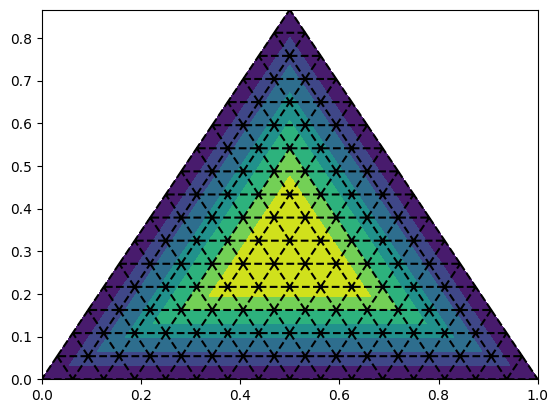

In [4]:
# source code: https://stackoverflow.com/questions/29512046/how-to-create-ternary-contour-plot-in-python

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri


# first load some data:  format x1,x2,x3,value
test_data = np.array([[0,0,1,0],
                      [0,1,0,0],
                      [1,0,0,0],
                      [0.25,0.25,0.5,1],
                      [0.25,0.5,0.25,1],
                      [0.5,0.25,0.25,1]])

# barycentric coords: (a,b,c)
a=test_data[:,0]
b=test_data[:,1]
c=test_data[:,2]

# values is stored in the last column
v = test_data[:,-1]

# translate the data to cartesian corrds
x = 0.5 * ( 2.*b+c ) / ( a+b+c )
y = 0.5*np.sqrt(3) * c / (a+b+c)


# create a triangulation out of these points
T = tri.Triangulation(x,y)

# plot the contour
plt.tricontourf(x,y,T.triangles,v)


# create the grid
corners = np.array([[0, 0], [1, 0], [0.5,  np.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# creating the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

#plotting the mesh
plt.triplot(trimesh,'k--')


plt.show()
